In [1]:
import numpy as np
import pandas as pd
import time
import requests
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials as YF
from pandas_datareader import data
#import edgar
import requests
from tqdm import tqdm
from fbprophet import Prophet
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [2]:
def convert_time(epoch):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(epoch))
    
epoch_time = int(time.time())
day_epoch = 60*60*24
days_back = 365
stocks = {}
tick="AAPL"
df = data.DataReader(tick, 
            start=convert_time(epoch_time - (days_back* day_epoch)), 
            end=convert_time(epoch_time), 
            data_source='yahoo')

In [3]:
df.rename(columns={"Date":"ds","Adj Close":"y"}, inplace=True)
df['ds'] = df.index
df_no_weekdays = df[df['ds'].dt.dayofweek < 5]
#df = pd.read_csv('./example_wp_log_peyton_manning.csv')

df_no_weekdays.tail()

,High,Low,Open,Close,Volume,y,ds
Date,,,,,,,
2021-01-15,130.220001,127.000000,128.779999,127.139999,111235300.0,127.139999,2021-01-15
2021-01-19,128.710007,126.940002,127.779999,127.830002,90757300.0,127.830002,2021-01-19
2021-01-20,132.490005,128.550003,128.660004,132.029999,104319500.0,132.029999,2021-01-20
2021-01-21,139.669998,133.589996,133.800003,136.869995,120529500.0,136.869995,2021-01-21
2021-01-22,139.850006,135.020004,136.279999,139.070007,113907200.0,139.070007,2021-01-22


In [4]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
611,2022-01-18
612,2022-01-19
613,2022-01-20
614,2022-01-21
615,2022-01-22


In [6]:
def isweekday(ds):
    date = pd.to_datetime(ds)
    return(date.weekday() < 5)
future['isweekday'] = future['ds'].apply(isweekday)
future_mod = future[future['isweekday'] ==1]
future_mod.head()

,ds,isweekday
0,2020-01-27,True
1,2020-01-28,True
2,2020-01-29,True
3,2020-01-30,True
4,2020-01-31,True


In [7]:
# Python
forecast = m.predict(future_mod)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
506,2022-01-17,210.525918,104.286266,318.721805
507,2022-01-18,211.172205,106.646694,320.841517
508,2022-01-19,211.567100,106.227708,322.713033
509,2022-01-20,211.616640,104.354420,320.308678
510,2022-01-21,211.279926,105.073154,323.548504


In [8]:
dfw = forecast
dfw.rename(columns={"ds":"datetime"},inplace=True)
dfw.index = pd.to_datetime(dfw.datetime)
dfw = dfw[["yhat"]]

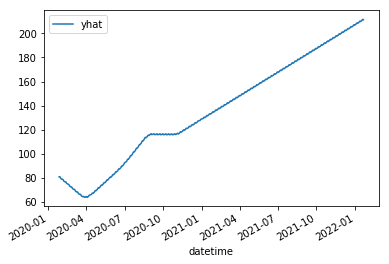

In [9]:
dfw.plot()
plt.show()

In [49]:
dfw.tail(50)

,yhat
datetime,
2021-12-03,118.887446
2021-12-04,-63.040942
2021-12-05,-63.075387
2021-12-06,118.642623
2021-12-07,119.637993
2021-12-08,119.622090
2021-12-09,120.879672
2021-12-10,118.646672
2021-12-11,-63.281716


In [37]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 433 entries, 2020-10-14 to 2022-01-21
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  433 non-null    datetime64[ns]
 1   yhat      433 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.1 KB
